In [1]:
import re
import json
from io import StringIO
from bs4 import *
import requests


# Yahoo Finance Scraper tesitng (Failed for Decryption)


In [54]:

"""
url_stats = 'https://finance.yahoo.com/quote/{}}/key-statistics?p={}'
url_prof = 'https://finance.yahoo.com/quote/{}/profile?p={}'
url_fina = 'https://finance.yahoo.com/quote/{}/financials?p={}'
stock = 'F'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://www.google.com/',
    # ... add other headers as necessary
}
response = requests.get(url_fina.format(stock,stock),headers=headers)
soup = BeautifulSoup(response.text, 'html.parser')
pattern = re.compile(r'\s--\sData\s--\s')
script_data = soup.find('script', string= pattern).contents[0]
"""

In [5]:
import yfinance as yf
from collections import defaultdict

In [6]:
s = defaultdict()

In [7]:
msft = yf.Ticker("MSFT")
print(msft)

yfinance.Ticker object <MSFT>


In [8]:
import numpy as np

In [9]:
msft.history(period="max")

KeyboardInterrupt: 

In [9]:
msft.actions

,Dividends,Stock Splits
Date,,
1987-09-21 00:00:00-04:00,0.00,2.0
1990-04-16 00:00:00-04:00,0.00,2.0
1991-06-27 00:00:00-04:00,0.00,1.5
1992-06-15 00:00:00-04:00,0.00,1.5
1994-05-23 00:00:00-04:00,0.00,2.0
...,...,...
2022-11-16 00:00:00-05:00,0.68,0.0
2023-02-15 00:00:00-05:00,0.68,0.0
2023-05-17 00:00:00-04:00,0.68,0.0


In [13]:
msft.history(period="1mo",interval="30m")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-11-02 09:30:00-04:00,347.239990,347.730011,344.769989,346.429993,4901268,0.0,0.0
2023-11-02 10:00:00-04:00,346.429993,347.600006,345.299988,347.329987,1857094,0.0,0.0
2023-11-02 10:30:00-04:00,347.364990,348.769989,346.390015,348.540009,1795011,0.0,0.0
2023-11-02 11:00:00-04:00,348.549988,348.799988,347.339996,347.440002,1341218,0.0,0.0
2023-11-02 11:30:00-04:00,347.480011,348.399994,346.640015,347.320007,1091277,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-01 13:30:00-05:00,373.440002,373.739990,372.829987,373.089996,1295710,0.0,0.0
2023-12-01 14:00:00-05:00,373.089996,374.549988,372.799988,374.359985,1241746,0.0,0.0
2023-12-01 14:30:00-05:00,374.385010,375.279999,374.250000,375.170013,1120313,0.0,0.0


In [10]:
import matplotlib.pyplot as plt

In [11]:
ticker = "AAPL"  # Stock ticker
period = "5mo"   # Time period: 1 month

# Fetch stock data
data = yf.download(ticker, period=period,interval="1d")

[*********************100%%**********************]  1 of 1 completed


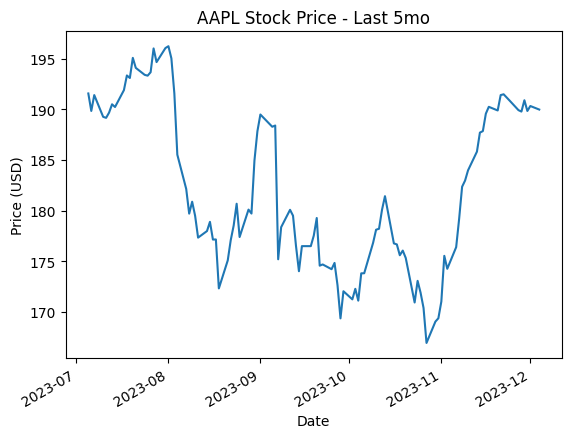

In [12]:
# Plot the closing prices
data['Open'].plot(title=f"{ticker} Stock Price - Last {period}")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [13]:
data['Open']

Date
2023-07-05    191.570007
2023-07-06    189.839996
2023-07-07    191.410004
2023-07-10    189.259995
2023-07-11    189.160004
                 ...    
2023-11-28    189.779999
2023-11-29    190.899994
2023-11-30    189.839996
2023-12-01    190.330002
2023-12-04    189.979996
Name: Open, Length: 107, dtype: float64

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

urls = [
    'https://finance.yahoo.com/quote/{ticker}/financials?p={ticker}',
    'https://finance.yahoo.com/quote/{ticker}/balance-sheet?p={ticker}',
    'https://finance.yahoo.com/quote/{ticker}/cash-flow?p={ticker}'
]

headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/114.0'}

def get_soup(url):
    r = requests.get(url, headers=headers)
    return BeautifulSoup(r.content, 'html.parser')

ticker = 'AMZN'
for url in urls:
    soup = get_soup(url.format(ticker=ticker))

    table = soup.select_one('.BdT')
    all_data = []
    for row in table.select('.D\(tbr\)'):
        data = [cell.text for cell in row.select('.Ta\(c\), .Ta\(start\)')]
        all_data.append(data)

    df = pd.DataFrame(all_data[1:], columns=all_data[0])
    print(df)
    print()

                                            Breakdown          ttm  \
0                                       Total Revenue  554,028,000   
1                                     Cost of Revenue  469,851,000   
2                                        Gross Profit   84,177,000   
3                                   Operating Expense   57,797,000   
4                                    Operating Income   26,380,000   
5           Net Non Operating Interest Income Expense     -670,000   
6                                Other Income Expense   -2,801,000   
7                                       Pretax Income   22,909,000   
8                                       Tax Provision    2,831,000   
9            Earnings from Equity Interest Net of Tax        1,000   
10                     Net Income Common Stockholders   20,079,000   
11           Diluted NI Available to Com Stockholders   20,079,000   
12                                          Basic EPS         1.95   
13                  

In [14]:
import pandas as pd

In [15]:
dates = data['Open'].keys()
dateList = [str(dates[i])[:-9] for i in range(len(dates))]
dateList

['2023-07-05',
 '2023-07-06',
 '2023-07-07',
 '2023-07-10',
 '2023-07-11',
 '2023-07-12',
 '2023-07-13',
 '2023-07-14',
 '2023-07-17',
 '2023-07-18',
 '2023-07-19',
 '2023-07-20',
 '2023-07-21',
 '2023-07-24',
 '2023-07-25',
 '2023-07-26',
 '2023-07-27',
 '2023-07-28',
 '2023-07-31',
 '2023-08-01',
 '2023-08-02',
 '2023-08-03',
 '2023-08-04',
 '2023-08-07',
 '2023-08-08',
 '2023-08-09',
 '2023-08-10',
 '2023-08-11',
 '2023-08-14',
 '2023-08-15',
 '2023-08-16',
 '2023-08-17',
 '2023-08-18',
 '2023-08-21',
 '2023-08-22',
 '2023-08-23',
 '2023-08-24',
 '2023-08-25',
 '2023-08-28',
 '2023-08-29',
 '2023-08-30',
 '2023-08-31',
 '2023-09-01',
 '2023-09-05',
 '2023-09-06',
 '2023-09-07',
 '2023-09-08',
 '2023-09-11',
 '2023-09-12',
 '2023-09-13',
 '2023-09-14',
 '2023-09-15',
 '2023-09-18',
 '2023-09-19',
 '2023-09-20',
 '2023-09-21',
 '2023-09-22',
 '2023-09-25',
 '2023-09-26',
 '2023-09-27',
 '2023-09-28',
 '2023-09-29',
 '2023-10-02',
 '2023-10-03',
 '2023-10-04',
 '2023-10-05',
 '2023-10-

In [16]:
vals = [data['Open'][j] for j in dateList]

In [17]:
class Normalizer():
    def __init__(self):
        self.mu = None
        self.sd = None

    def fit_transform(self, x):
        self.mu = np.mean(x, axis=(0), keepdims=True)
        self.sd = np.std(x, axis=(0), keepdims=True)
        normalized_x = (x - self.mu)/self.sd
        return normalized_x

    def inverse_transform(self, x):
        return (x*self.sd) + self.mu

# normalize
scaler = Normalizer()
normalized_data_close_price = scaler.fit_transform(vals)

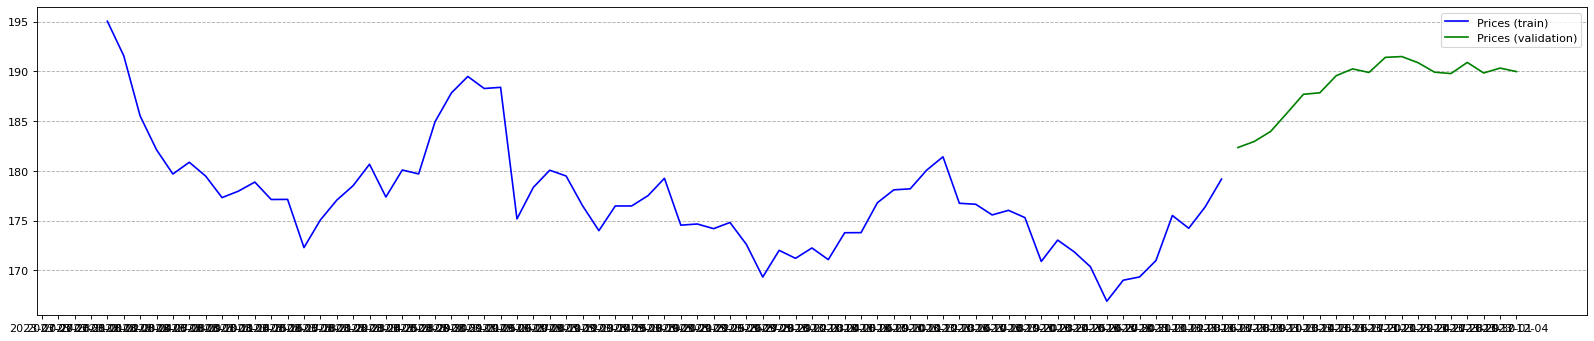

In [18]:
def prepare_data_x(x, window_size):
    # perform windowing
    n_row = x.shape[0] - window_size + 1
    output = np.lib.stride_tricks.as_strided(x, shape=(n_row, window_size), strides=(x.strides[0], x.strides[0]))
    return output[:-1], output[-1]


def prepare_data_y(x, window_size):
    # # perform simple moving average
    # output = np.convolve(x, np.ones(window_size), 'valid') / window_size

    # use the next day as label
    output = x[window_size:]
    return output

window_size = 20
data_x, data_x_unseen = prepare_data_x(normalized_data_close_price, window_size=window_size )
data_y = prepare_data_y(normalized_data_close_price, window_size=window_size)

num_data_points = len(dateList)
# split dataset

split_index = int(data_y.shape[0]*0.8) #0.8 for train split data size


data_x_train = data_x[:split_index]
data_x_val = data_x[split_index:]
data_y_train = data_y[:split_index]
data_y_val = data_y[split_index:]

# prepare data for plotting

to_plot_data_y_train = np.zeros(num_data_points)
to_plot_data_y_val = np.zeros(num_data_points)

to_plot_data_y_train[window_size:split_index+window_size] = scaler.inverse_transform(data_y_train)
to_plot_data_y_val[split_index+window_size:] = scaler.inverse_transform(data_y_val)

to_plot_data_y_train = np.where(to_plot_data_y_train == 0, None, to_plot_data_y_train)
to_plot_data_y_val = np.where(to_plot_data_y_val == 0, None, to_plot_data_y_val)

## plots

fig = plt.figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
plt.plot(dateList, to_plot_data_y_train, label="Prices (train)", color="b")
plt.plot(dateList, to_plot_data_y_val, label="Prices (validation)", color="g")

plt.grid( which='major', axis='y', linestyle='--')
plt.legend()
plt.show()

In [20]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from alpha_vantage.timeseries import TimeSeries 

print("All libraries loaded")

All libraries loaded


In [22]:
class TimeSeriesDataset(Dataset):
    def __init__(self, x, y):
        x = np.expand_dims(x, 2) # in our case, we have only 1 feature, so we need to convert `x` into [batch, sequence, features] for LSTM
        self.x = x.astype(np.float32)
        self.y = y.astype(np.float32)
        
    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return (self.x[idx], self.y[idx])

dataset_train = TimeSeriesDataset(data_x_train, data_y_train)
dataset_val = TimeSeriesDataset(data_x_val, data_y_val)

print("Train data shape", dataset_train.x.shape, dataset_train.y.shape)
print("Validation data shape", dataset_val.x.shape, dataset_val.y.shape)

train_dataloader = DataLoader(dataset_train, batch_size=64, shuffle=True)
val_dataloader = DataLoader(dataset_val, batch_size=64, shuffle=True)

Train data shape (69, 20, 1) (69,)
Validation data shape (18, 20, 1) (18,)


In [23]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=32, num_layers=2, output_size=1, dropout=0.2):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.linear_1 = nn.Linear(input_size, hidden_layer_size)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(hidden_layer_size, hidden_size=self.hidden_layer_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(num_layers*hidden_layer_size, output_size)
        
        self.init_weights()

    def init_weights(self):
        for name, param in self.lstm.named_parameters():
            if 'bias' in name:
                 nn.init.constant_(param, 0.0)
            elif 'weight_ih' in name:
                 nn.init.kaiming_normal_(param)
            elif 'weight_hh' in name:
                 nn.init.orthogonal_(param)

    def forward(self, x):
        batchsize = x.shape[0]

        # layer 1
        x = self.linear_1(x)
        x = self.relu(x)
        
        # LSTM layer
        lstm_out, (h_n, c_n) = self.lstm(x)

        # reshape output from hidden cell into [batch, features] for `linear_2`
        x = h_n.permute(1, 0, 2).reshape(batchsize, -1) 
        
        # layer 2
        x = self.dropout(x)
        predictions = self.linear_2(x)
        return predictions[:,-1]

In [25]:
def run_epoch(dataloader, is_training=False):
    epoch_loss = 0

    if is_training:
        model.train()
    else:
        model.eval()

    for idx, (x, y) in enumerate(dataloader):
        if is_training:
            optimizer.zero_grad()

        batchsize = x.shape[0]

        x = x.to("cpu")
        y = y.to("cpu")

        out = model(x)
        loss = criterion(out.contiguous(), y.contiguous())

        if is_training:
            loss.backward()
            optimizer.step()

        epoch_loss += (loss.detach().item() / batchsize)

    lr = scheduler.get_last_lr()[0]

    return epoch_loss, lr

train_dataloader = DataLoader(dataset_train, batch_size=64, shuffle=True)
val_dataloader = DataLoader(dataset_val, batch_size=64, shuffle=True)

model = LSTMModel(input_size=1, hidden_layer_size=32, num_layers=2, output_size=1, dropout=0.2)
model = model.to("cpu")

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, betas=(0.9, 0.98), eps=1e-9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=40, gamma=0.1)

for epoch in range(100):
    loss_train, lr_train = run_epoch(train_dataloader, is_training=True)
    loss_val, lr_val = run_epoch(val_dataloader)
    scheduler.step()
    
    print('Epoch[{}/{}] | loss train:{:.6f}, test:{:.6f} | lr:{:.6f}'
              .format(epoch+1, 100, loss_train, loss_val, lr_train))

Epoch[1/100] | loss train:0.041156, test:0.119491 | lr:0.010000
Epoch[2/100] | loss train:0.058769, test:0.081191 | lr:0.010000
Epoch[3/100] | loss train:0.081093, test:0.039866 | lr:0.010000
Epoch[4/100] | loss train:0.094310, test:0.017434 | lr:0.010000
Epoch[5/100] | loss train:0.072161, test:0.010393 | lr:0.010000
Epoch[6/100] | loss train:0.052870, test:0.011177 | lr:0.010000
Epoch[7/100] | loss train:0.024218, test:0.010296 | lr:0.010000
Epoch[8/100] | loss train:0.028128, test:0.011076 | lr:0.010000
Epoch[9/100] | loss train:0.019834, test:0.014895 | lr:0.010000
Epoch[10/100] | loss train:0.015415, test:0.019179 | lr:0.010000
Epoch[11/100] | loss train:0.018372, test:0.021608 | lr:0.010000
Epoch[12/100] | loss train:0.057371, test:0.017928 | lr:0.010000
Epoch[13/100] | loss train:0.042435, test:0.010047 | lr:0.010000
Epoch[14/100] | loss train:0.012943, test:0.005610 | lr:0.010000
Epoch[15/100] | loss train:0.010838, test:0.004876 | lr:0.010000
Epoch[16/100] | loss train:0.01257

In [27]:
from sec_edgar_downloader import Downloader

dl = Downloader("/path/to/save/documents")
# Download all 10-K filings for Microsoft (ticker MSFT)
dl.get("10-K", "MSFT")
# Download all 10-Q filings for Microsoft
dl.get("10-Q", "MSFT")

TypeError: Downloader.__init__() missing 1 required positional argument: 'email_address'

In [ ]:
#  PPPLJDLGMVEXMP1O API key for Alpha Vantage

All libraries loaded


In [32]:
config = {
    "alpha_vantage": {
        "key": "demo", # you can use the demo API key for this project, but please make sure to get your own API key at https://www.alphavantage.co/support/#api-key
        "symbol": "IBM",
        "outputsize": "full",
        "key_adjusted_close": "5. adjusted close",
    },
    "data": {
        "window_size": 20,
        "train_split_size": 0.80,
    }, 
    "plots": {
        "xticks_interval": 90, # show a date every 90 days
        "color_actual": "#001f3f",
        "color_train": "#3D9970",
        "color_val": "#0074D9",
        "color_pred_train": "#3D9970",
        "color_pred_val": "#0074D9",
        "color_pred_test": "#FF4136",
    },
    "model": {
        "input_size": 1, # since we are only using 1 feature, close price
        "num_lstm_layers": 2,
        "lstm_size": 32,
        "dropout": 0.2,
    },
    "training": {
        "device": "cpu", # "cuda" or "cpu"
        "batch_size": 64,
        "num_epoch": 100,
        "learning_rate": 0.01,
        "scheduler_step_size": 40,
    }
}

{'2023-12-01': {'1. open': '158.41', '2. high': '160.59', '3. low': '158.0', '4. close': '160.55', '5. adjusted close': '160.55', '6. volume': '4871860', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-11-30': {'1. open': '156.95', '2. high': '158.6', '3. low': '156.89', '4. close': '158.56', '5. adjusted close': '158.56', '6. volume': '6740622', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-11-29': {'1. open': '156.15', '2. high': '157.51', '3. low': '156.02', '4. close': '156.41', '5. adjusted close': '156.41', '6. volume': '3568887', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-11-28': {'1. open': '155.44', '2. high': '155.745', '3. low': '154.86', '4. close': '155.65', '5. adjusted close': '155.65', '6. volume': '2666182', '7. dividend amount': '0.0000', '8. split coefficient': '1.0'}, '2023-11-27': {'1. open': '154.99', '2. high': '156.135', '3. low': '154.75', '4. close': '155.57', '5. adjusted close': '155.57

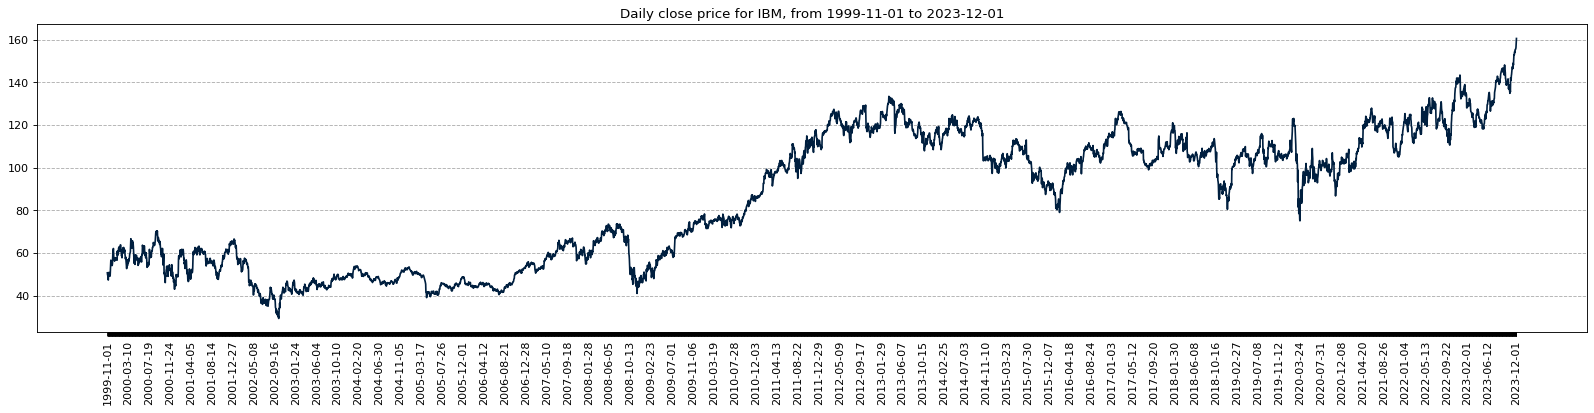

In [41]:
def download_data(config):
    ts = TimeSeries(key='demo') #you can use the demo API key for this project, but please make sure to eventually get your own API key at https://www.alphavantage.co/support/#api-key. 
    data, meta_data = ts.get_daily_adjusted(config["alpha_vantage"]["symbol"], outputsize=config["alpha_vantage"]["outputsize"])
    print(data)
    data_date = [date for date in data.keys()]
    data_date.reverse()

    data_close_price = [float(data[date][config["alpha_vantage"]["key_adjusted_close"]]) for date in data.keys()]
    data_close_price.reverse()
    data_close_price = np.array(data_close_price)

    num_data_points = len(data_date)
    display_date_range = "from " + data_date[0] + " to " + data_date[num_data_points-1]
    print("Number data points", num_data_points, display_date_range)

    return data_date, data_close_price, num_data_points, display_date_range

data_date, data_close_price, num_data_points, display_date_range = download_data(config)

# plot

fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
plt.plot(data_date, data_close_price, color=config["plots"]["color_actual"])
xticks = [data_date[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
x = np.arange(0,len(xticks))
plt.xticks(x, xticks, rotation='vertical')
plt.title("Daily close price for " + config["alpha_vantage"]["symbol"] + ", " + display_date_range)
plt.grid( which='major', axis='y', linestyle='--')
plt.show()

In [42]:
class Normalizer():
    def __init__(self):
        self.mu = None
        self.sd = None

    def fit_transform(self, x):
        self.mu = np.mean(x, axis=(0), keepdims=True)
        self.sd = np.std(x, axis=(0), keepdims=True)
        normalized_x = (x - self.mu)/self.sd
        return normalized_x

    def inverse_transform(self, x):
        return (x*self.sd) + self.mu

# normalize
scaler = Normalizer()
normalized_data_close_price = scaler.fit_transform(data_close_price)

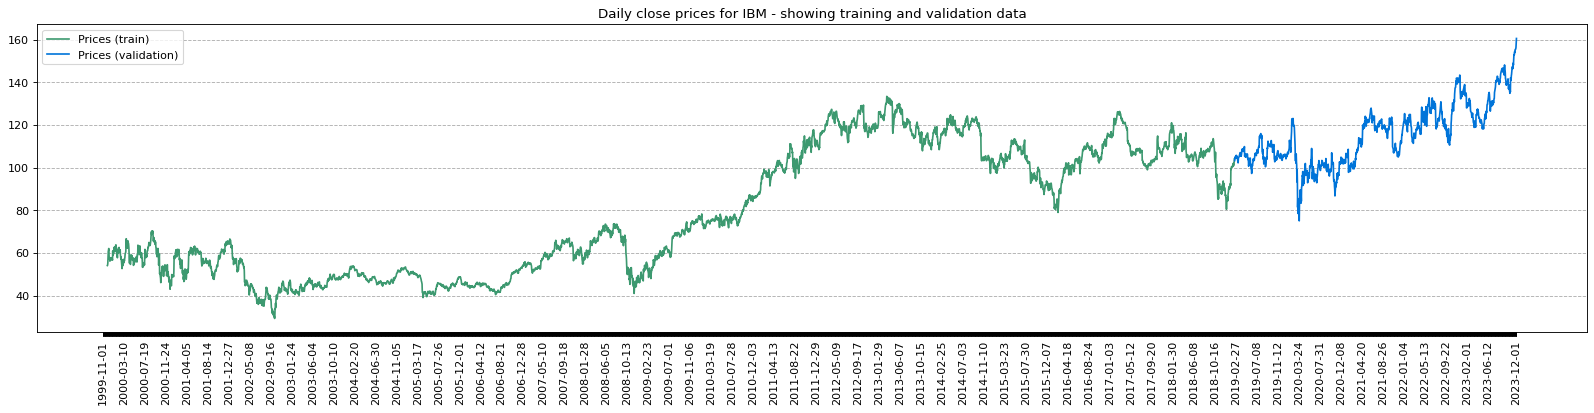

In [44]:
def prepare_data_x(x, window_size):
    # perform windowing
    n_row = x.shape[0] - window_size + 1
    output = np.lib.stride_tricks.as_strided(x, shape=(n_row, window_size), strides=(x.strides[0], x.strides[0]))
    return output[:-1], output[-1]


def prepare_data_y(x, window_size):
    # # perform simple moving average
    # output = np.convolve(x, np.ones(window_size), 'valid') / window_size

    # use the next day as label
    output = x[window_size:]
    return output

data_x, data_x_unseen = prepare_data_x(normalized_data_close_price, window_size=config["data"]["window_size"])
data_y = prepare_data_y(normalized_data_close_price, window_size=config["data"]["window_size"])

# split dataset

split_index = int(data_y.shape[0]*config["data"]["train_split_size"])
data_x_train = data_x[:split_index]
data_x_val = data_x[split_index:]
data_y_train = data_y[:split_index]
data_y_val = data_y[split_index:]

# prepare data for plotting

to_plot_data_y_train = np.zeros(num_data_points)
to_plot_data_y_val = np.zeros(num_data_points)

to_plot_data_y_train[config["data"]["window_size"]:split_index+config["data"]["window_size"]] = scaler.inverse_transform(data_y_train)
to_plot_data_y_val[split_index+config["data"]["window_size"]:] = scaler.inverse_transform(data_y_val)

to_plot_data_y_train = np.where(to_plot_data_y_train == 0, None, to_plot_data_y_train)
to_plot_data_y_val = np.where(to_plot_data_y_val == 0, None, to_plot_data_y_val)

## plots

fig = figure(figsize=(25, 5), dpi=80)
fig.patch.set_facecolor((1.0, 1.0, 1.0))
plt.plot(data_date, to_plot_data_y_train, label="Prices (train)", color=config["plots"]["color_train"])
plt.plot(data_date, to_plot_data_y_val, label="Prices (validation)", color=config["plots"]["color_val"])
xticks = [data_date[i] if ((i%config["plots"]["xticks_interval"]==0 and (num_data_points-i) > config["plots"]["xticks_interval"]) or i==num_data_points-1) else None for i in range(num_data_points)] # make x ticks nice
x = np.arange(0,len(xticks))
plt.xticks(x, xticks, rotation='vertical')
plt.title("Daily close prices for " + config["alpha_vantage"]["symbol"] + " - showing training and validation data")
plt.grid( which='major', axis='y', linestyle='--')
plt.legend()
plt.show()